In [8]:
import random
from typing import List, TypedDict
from langgraph.graph import StateGraph, END

class AgentState(TypedDict):
    number: List[int]
    counter: int
    name: str
    
def greeting(state: AgentState) -> AgentState:
    state["name"] = f"Hola {state["name"]}!"
    state["counter"] = 0
    return state

def random_node(state: AgentState) -> AgentState:
    state["number"].append(random.randint(1, 100))
    state["counter"] += 1
    return state

def should_continue(state: AgentState) -> str:
    if state["counter"] < 10:
        return "loop"
    else:
        return END

graph = StateGraph(AgentState)
graph.add_node(greeting)
graph.add_node(random_node)

graph.set_entry_point("greeting")
graph.add_edge("greeting", "random_node")
graph.add_conditional_edges("random_node", should_continue, {
    "loop": "random_node",
    END: END
})


app = graph.compile()

app.invoke({"name": "Andrés", "number": [], "counter": 0})

{'number': [86, 54, 26, 59, 2, 77, 66, 35, 89, 24],
 'counter': 10,
 'name': 'Hola Andrés!'}

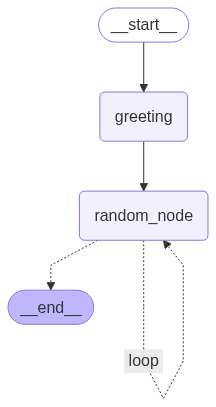

In [9]:
from IPython.display import Image, display


display(Image(app.get_graph().draw_mermaid_png()))